In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=AMIR-PC\SQLEXPRESS;'
                      'Database=training_project;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

print('Connected to SQL Server')

Connected to SQL Server


In [18]:
df = pd.read_sql_query('''
                SELECT * 
                FROM Student_Personal
                LEFT JOIN Student_Marks ON Student_Personal.Std_ID = Student_Marks.Std_ID
                    ''', conn)

df.head(10)


,Std_ID,Std_Name,Std_DOB,Std_Age,Std_Street,Std_State,Std_Country,Std_Postcode,Std_Phone,Std_Email,...,English,Science,Maths,Arts,History,Geography,Total,Average,Result,Grade
0,101,Preeta a/l Merican,1979-03-31,43,No. 36 Jln Yong Shook Lin Seksyen 52,Selangor,Malaysia,46200,0125551111,preeta@gmail.com,...,60,52,62,99,33,57,448,64.0,PASS,C
1,102,Siauw Koong Cheng,1980-06-01,42,13A Jln Pudu Ulu,Kuala Lumpur,Malaysia,56100,0125551112,siauw@gmail.com,...,65,75,35,78,31,43,382,54.0,PASS,D
2,103,Muhammad Haji Syed Aidi,1980-10-19,41,1 6 Jln Pjs 11/8 Taman Bandar Sunway,Selangor,Malaysia,46150,0125551113,muhammad@gmail.com,...,81,56,77,65,29,73,469,67.0,PASS,C
3,104,Veloo Munusamy,1980-11-23,41,32B Jalan Pekaka 8/3 Kota Damansara,Selangor,Malaysia,47810,0125551114,veloo@gmail.com,...,95,64,92,60,47,22,402,57.0,PASS,D
4,105,Philip Nguei Ong Khoi,1981-06-10,41,No. 8 Jalan 4/91A Taman Shamelin Perkasa Batu,Kuala Lumpur,Malaysia,56100,0125551115,philip@gmail.com,...,74,25,75,43,39,90,374,53.0,PASS,D
5,106,Noor Zulaikha Rosnan binti Syawal,1981-07-06,41,9-1 Jalan 13/142 Taman Orkid Desa,Kuala Lumpur,Malaysia,56000,0125551116,noor@gmail.com,...,76,89,37,66,28,61,439,62.0,PASS,C
6,107,Muhammed Wan Muazzam Zulkernain,1982-06-01,40,18 Jln Lapangan Terbang Lama,Kuala Lumpur,Malaysia,50460,0125551117,muhammed@gmail.com,...,65,24,65,47,38,24,303,43.0,FAIL,F
7,108,Selva Muniandy,1984-08-14,38,"Jalan 20/7, Paramount Garden",Selangor,Malaysia,46300,0125551118,selva@gmail.com,...,20,21,48,57,58,95,389,55.0,PASS,D
8,109,Daniel Seah Zeng Shing,1985-03-06,37,"Perdana Business Centre, Bandar Damansara Perdana",Selangor,Malaysia,47820,0125551119,daniel@gmail.com,...,91,37,67,38,23,30,357,51.0,PASS,D
9,110,Viatilingam Vadiveloo,1986-12-02,35,"No 142-146, Jalan Tuanku Abdul Rahman",Kuala Lumpur,Malaysia,50100,0125551120,viatilingam@gmail.com,...,64,25,37,54,31,59,313,44.0,FAIL,F


In [3]:
#initializing empty dataframe
s_id = []
s_name = []
s_dob = []
s_age = []
s_street = []
s_state = []
s_country = []
s_postcode = []
s_phone = []
s_email = []

marks_malay = []
marks_english = []
marks_science = []
marks_maths = []
marks_arts = []
marks_history = []
marks_geography = []

marks_total = []
marks_average = []
marks_grade = []
marks_result = []

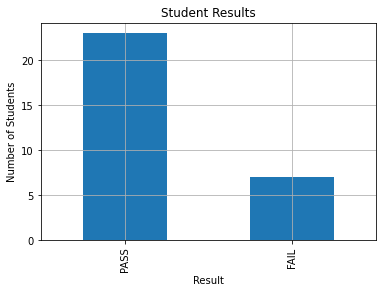

In [32]:
fails = df['Result'].value_counts()
fails.plot.bar()

plt.title('Student Results')
plt.xlabel('Result')
plt.ylabel('Number of Students')
plt.grid()


plt.savefig('./output/student-result.png')
plt.show()


In [33]:
df['Result'].value_counts()

PASS    23
FAIL     7
Name: Result, dtype: int64

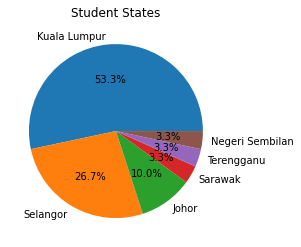

In [20]:
states = df['Std_State'].value_counts()

plt.pie(states, labels = states.index, autopct='%.1f%%')
plt.title('Student States')

plt.savefig('./output/student-state.png')
plt.show()

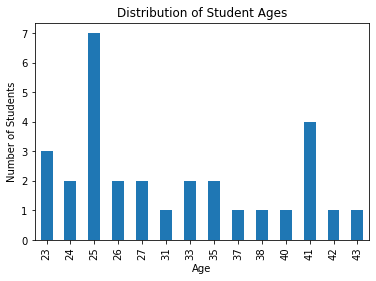

In [21]:
age = df['Std_Age'].value_counts().sort_index()
age.plot.bar()

plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Number of Students')

plt.savefig('./output/student-age-distribution.png')
plt.show()
